# Dataset demographic bias metrics

This package implements several metrics for dataset demographic bias. The 
metrics are organized as follows:

* Representational bias metrics (`dataset_bias_metrics.representational`)
* Stereotypical bias metrics at the global level (`dataset_bias_metrics.stereotypical`)
* Stereotypical bias metrics at the local level (`dataset_bias_metrics.local_stereotypical`)
* Some visualization tools (`dataset_bias_metrics.visualization`)

## Installation

Binary installers for the latest released version are available at the [Python Package Index (PyPI)](https://pypi.org/project/dataset_bias_metrics).

`pip install dataset-bias-metrics`

## Usage

### Including the libraries

In [1]:
import pandas as pd
import os

import dataset_bias_metrics as dbm

### Loading example datasets

The .csv files available in `example_data` correspond to the datasets analyzed in the paper. Only the demographic data with no identifying information is provided, and the rows are scrambled to avoid the identification of specific samples.

In [2]:
datasets = {}
for filename in os.listdir('example_data'):
    if filename.endswith(".csv"):
        ds = pd.read_csv(os.path.join('example_data', filename))
        datasets[filename.split('.')[0]] = ds
    
display(datasets['raf-db2'])

,age,race,gender,label
0,20-29,Indian,Male,disgust
1,20-29,White,Male,disgust
2,30-39,White,Male,angry
3,60-69,Southeast Asian,Female,happy
4,40-49,East Asian,Male,neutral
...,...,...,...,...
15121,30-39,White,Male,sad
15122,30-39,East Asian,Male,happy
15123,20-29,Black,Male,fear
15124,30-39,White,Female,happy


### Representational bias

The following is an example of the application of the representational bias metrics:

In [3]:
# Application of a single metric
dbm.representational.ens(datasets['adfes'], 'race')

2.478206948646503

In [4]:
# It also supports combined components
dbm.representational.ens(datasets['adfes'], ['age', 'race'])

3.0404964294246533

'Race component'

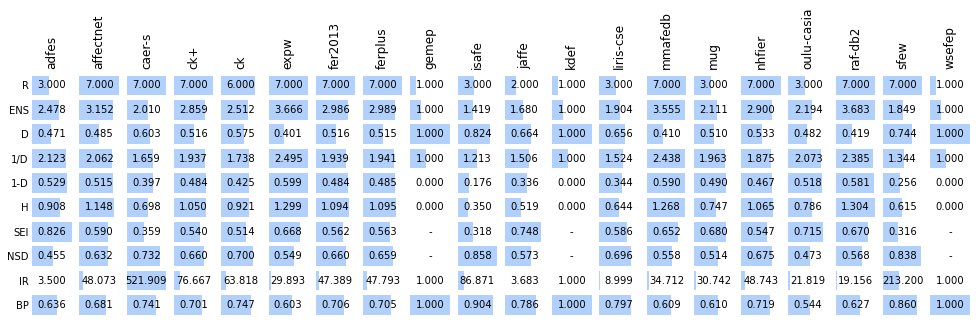

In [5]:
# Comparative analysis across datasets, with visualization
component = 'race'
repbias = pd.DataFrame(0, 
                       index=datasets.keys(), 
                       columns=dbm.representational.metrics.keys())

for dsname, ds in datasets.items():
    for metricname, m in dbm.representational.metrics.items():
        repbias.loc[dsname, metricname] = m(ds, component)

display(f'{component.capitalize()} component')
dbm.visualization.plotTable(repbias.T, normalizeAxis=1, sort=None)

### Stereotypical bias (global)

The following is an example of the application of the global stereotypical bias metrics:

In [6]:
# Application of a single metric
dbm.stereotypical.cramersv(datasets['expw'], 'race', 'label')

0.04104288518527493

'Race-Label components'

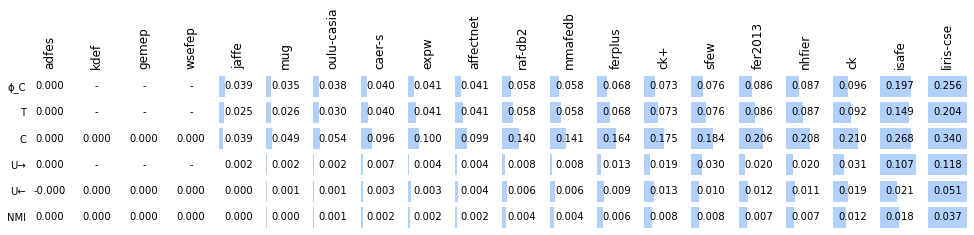

In [7]:
# Comparative analysis across datasets, with visualization

c1, c2 = ('race', 'label')
stereobias = pd.DataFrame(0, 
                          index=datasets.keys(), 
                          columns=dbm.stereotypical.metrics.keys())

for dsname, ds in datasets.items():
    for metricname, m in dbm.stereotypical.metrics.items():
        stereobias.loc[dsname, metricname] = m(ds, c1, c2)

display(f'{c1.capitalize()}-{c2.capitalize()} components')
dbm.visualization.plotTable(stereobias.T, normalizeAxis=1)

### Stereotypical bias (local)

The following is an example of the application of the local stereotypical bias metrics:

'Race-Label components, NMI'

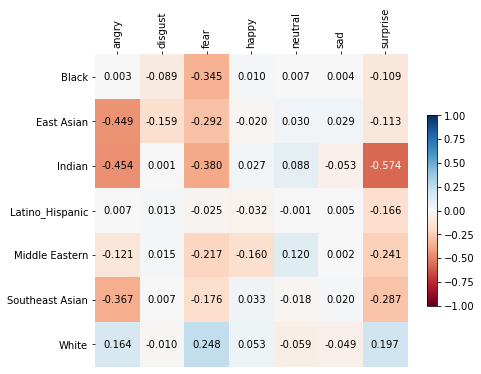

In [8]:
# Single metric application with visualization
ds = datasets['expw']
c1, c2 = ('race', 'label')

matrix = dbm.local_stereotypical.duchersz(ds, c1, c2)

display(f'{c1.capitalize()}-{c2.capitalize()} components, {metricname}')
dbm.visualization.plotMatrix(matrix)